In [1]:
import torch
from torchvision import transforms

from fashionmnist.data_setup import create_dataloaders
from fashionmnist.models import get_model
from fashionmnist.utils import plot_training_curves
from fashionmnist.train_engine import get_loss_fn, get_optimizer, train
from fashionmnist.eval_utils import get_predictions, plot_incorrect_predictions, plot_confusion_matrix, get_accuracy

/home/reynald/.cache/pypoetry/virtualenvs/fashionmnist-Tzki-XrV-py3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


For reproducibility:

In [2]:
torch.manual_seed(0)

Check if a GPU is available to speed up the process:

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Define some parameters

In [4]:
save_model_path = "../models"
writer_path = "../runs"
data_path='../data/'
train_ratio = 0.9
epochs = 10
learning_rate=0.001
batch_size=32
hidden_units = 50

Get the dataloaders

In [5]:
train_dataloader, val_dataloader, test_dataloader, class_names = create_dataloaders(
    data_path=data_path,
    train_ratio=train_ratio, 
    transforms=transforms.ToTensor(),
    batch_size=batch_size
)

Choose the model name, between `FCNetwork` and `Conv2LayersNetwork`

In [6]:
model_name = "Conv2LayersNetwork"

Get the model, the loss function and the optimizer

In [7]:
model = get_model(
    model_name=model_name, 
    output_shape=len(class_names),
    hidden_units=hidden_units,
    device=device)

In [8]:
loss_fn = get_loss_fn()
optimizer = get_optimizer(model, learning_rate=learning_rate)

Train the model

In [9]:
results = train(
    model, 
    train_dataloader, 
    val_dataloader, 
    loss_fn, 
    optimizer, 
    epochs=epochs, 
    device=device,
    save_model_path=save_model_path,
    writer_path=writer_path,
    extra_info={"hidden_units": hidden_units}
)

Created SummaryWriter, saving to ../runs/Conv2LayersNetwork_hidden_units=50.pth


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 231.38it/s]


Epoch: 0 | train_loss: 0.4058 | train_acc: 0.8550 | val_loss: 0.3150 | val_acc: 0.8816
Updated best model at ../models/Conv2LayersNetwork_hidden_units=50.pth


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 231.08it/s]


Epoch: 1 | train_loss: 0.2930 | train_acc: 0.8944 | val_loss: 0.3259 | val_acc: 0.8753


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 222.03it/s]


Epoch: 2 | train_loss: 0.2567 | train_acc: 0.9070 | val_loss: 0.2664 | val_acc: 0.9051
Updated best model at ../models/Conv2LayersNetwork_hidden_units=50.pth


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:01<00:00, 113.32it/s]


Epoch: 3 | train_loss: 0.2347 | train_acc: 0.9144 | val_loss: 0.2551 | val_acc: 0.9071
Updated best model at ../models/Conv2LayersNetwork_hidden_units=50.pth


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:01<00:00, 161.42it/s]


Epoch: 4 | train_loss: 0.2154 | train_acc: 0.9211 | val_loss: 0.3012 | val_acc: 0.8983


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:01<00:00, 153.39it/s]


Epoch: 5 | train_loss: 0.1987 | train_acc: 0.9277 | val_loss: 0.2778 | val_acc: 0.9023


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:01<00:00, 183.81it/s]


Epoch: 6 | train_loss: 0.1850 | train_acc: 0.9324 | val_loss: 0.2703 | val_acc: 0.9021


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 204.23it/s]


Epoch: 7 | train_loss: 0.1731 | train_acc: 0.9369 | val_loss: 0.2672 | val_acc: 0.9067


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 207.26it/s]


Epoch: 8 | train_loss: 0.1638 | train_acc: 0.9410 | val_loss: 0.2726 | val_acc: 0.9091


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 217.48it/s]

Epoch: 9 | train_loss: 0.1512 | train_acc: 0.9450 | val_loss: 0.2849 | val_acc: 0.9028


Plot losses and accuracies during training

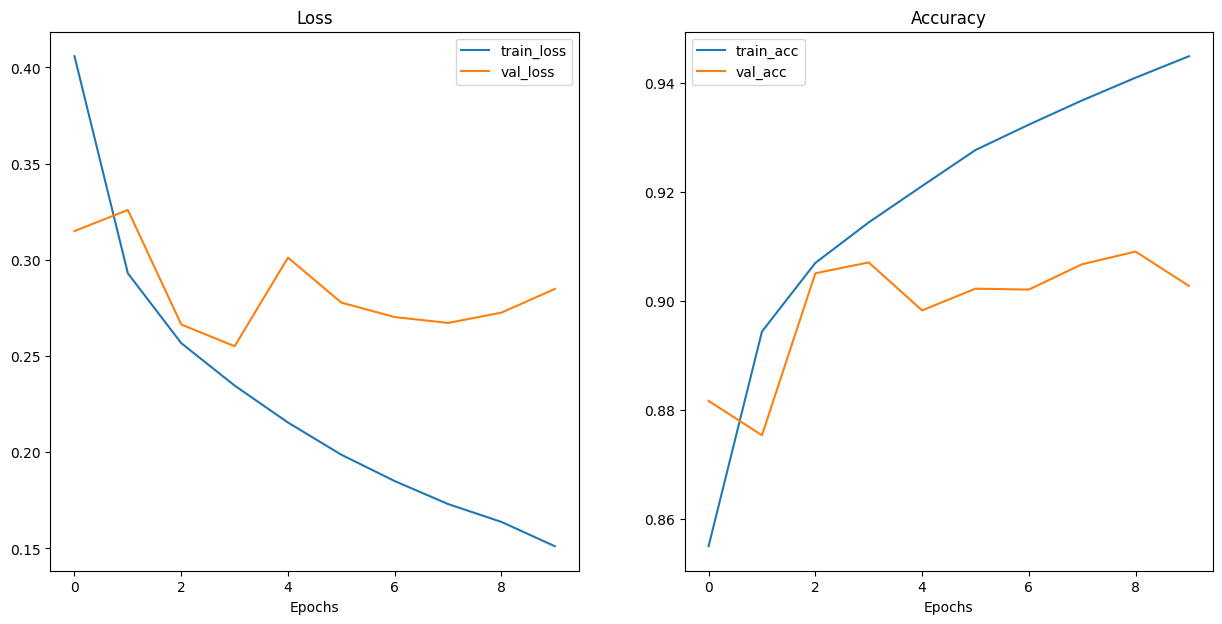

In [10]:
plot_training_curves(results)

Generate predictions on the test set, plot the confusion matrix and get the overall accuracy using the last model (not necessarily the best model, check the eval notebook for results with the best model)

In [11]:
y_true, y_pred = get_predictions(model, test_dataloader, device)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:13<00:00, 732.50it/s]


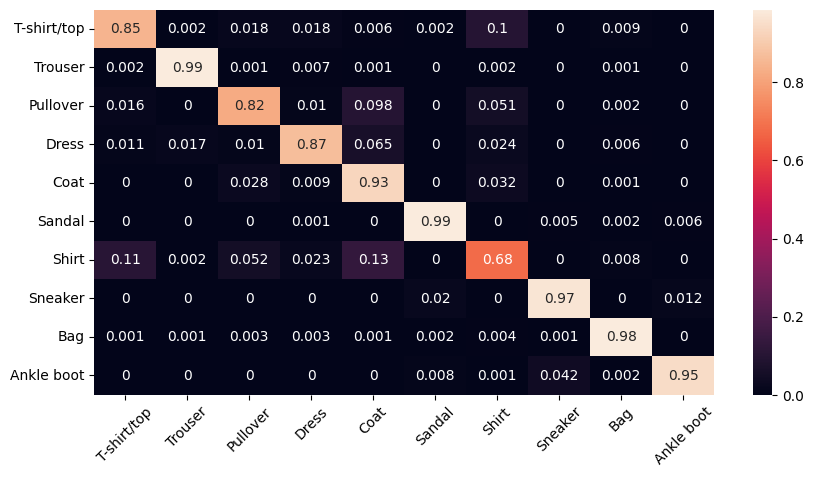

In [12]:
plot_confusion_matrix(y_true, y_pred, class_names)

In [13]:
print(f"Test accuracy: {get_accuracy(y_true, y_pred)}")

Test accuracy: 0.9014


Plot some incorrect predictions

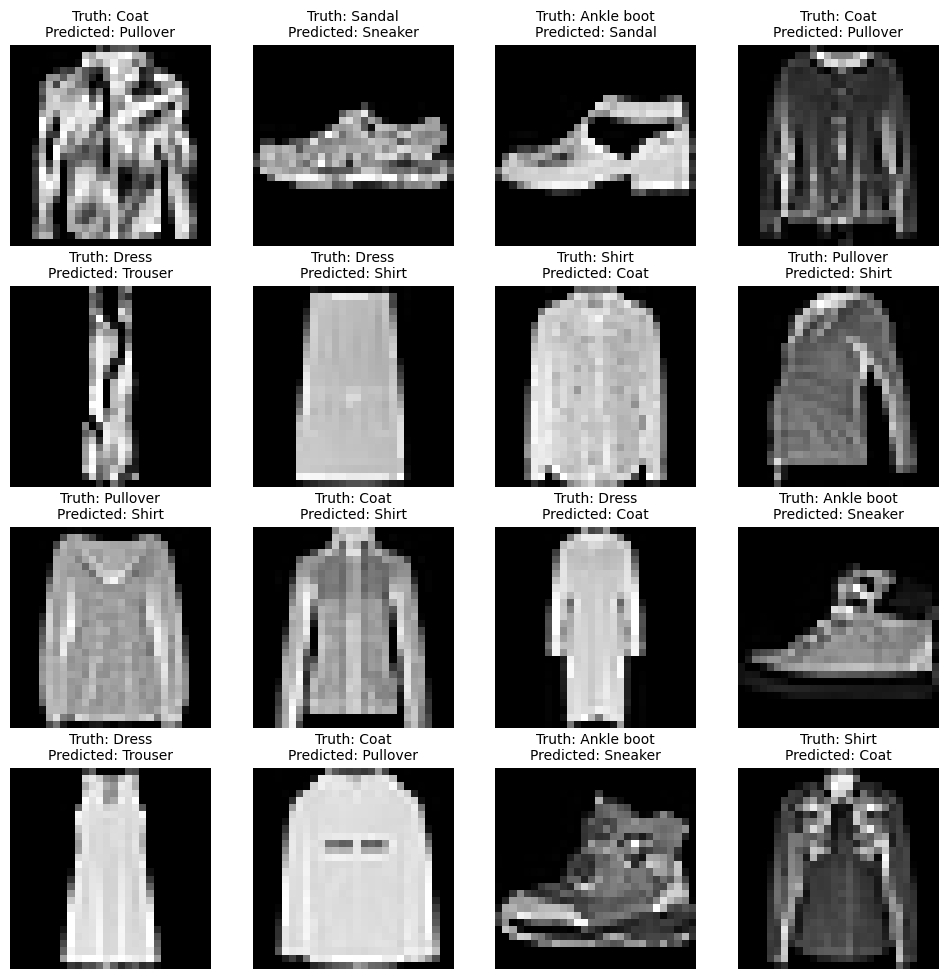

In [14]:
plot_incorrect_predictions(model, test_dataloader, class_names, device, n_predictions=16)